<a href="https://colab.research.google.com/github/boesuwanan/Senior-Research/blob/main/%5BSR%5D_ML2_Xg_(Partial_Dependence_Plot)_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data

In [ ]:
import pandas as pd
import numpy as np
import xgboost

In [ ]:
url = 'https://docs.google.com/spreadsheets/d/1p-1vpl6It4-7kzlonay-lAxi2X2RvepL/export?gid=1844082685&format=csv'
raw_df = pd.read_csv(url)
df = raw_df.drop(["monthly helper","quarterly helper", "quarterly helper", "year helper"], axis='columns')

df.head(3)

,ticks,sector,date,esg_OVERALL,esg_E,esg_S,esg_G,stringency_index,RETURN,VOLATILITY_260D_CALC,...,LIQUIDITY,ln_liq,BS_TOT_ASSET,ln_total_asset,RETURN_ON_ASSET,TOT_DEBT_TO_TOT_EQY,ln_debt_to_e,PX_TO_BOOK_RATIO,ln_PTB,SALES_GROWTH
0,AAV TB Equity,Industrials,1/1/2022,3.7,3.04,4.66,3.34,1282.03,-0.015873,42.116,...,1321.028191,7.186166,67589.4934,11.121208,-10.6392,337.8337,5.822554,1.2225,0.200898,55.8186
1,AAV TB Equity,Industrials,1/2/2022,3.7,3.04,4.66,3.34,1138.96,0.007968,41.226,...,2218.380655,7.704533,67589.4934,11.121208,-10.6392,337.8337,5.822554,1.2323,0.208882,55.8186
2,AAV TB Equity,Industrials,1/3/2022,3.7,3.04,4.66,3.34,1334.86,0.023530,40.338,...,1235.268015,7.119043,67589.4934,11.121208,-10.6392,337.8337,5.822554,2.1518,0.766305,55.8186


In [ ]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [ ]:
df['interaction_overall'] = df['esg_OVERALL'] * df['stringency_index']
df['interaction_e'] = df['esg_E'] * df['stringency_index']
df['interaction_s'] = df['esg_S'] * df['stringency_index']
df['interaction_g'] = df['esg_G'] * df['stringency_index']

In [ ]:
df.columns

Index(['ticks', 'sector', 'date', 'esg_OVERALL', 'esg_E', 'esg_S', 'esg_G',
       'stringency_index', 'RETURN', 'VOLATILITY_260D_CALC', 'ln_vol',
       'LIQUIDITY', 'ln_liq', 'BS_TOT_ASSET', 'ln_total_asset',
       'RETURN_ON_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'ln_debt_to_e',
       'PX_TO_BOOK_RATIO', 'ln_PTB', 'SALES_GROWTH', 'year',
       'interaction_overall', 'interaction_e', 'interaction_s',
       'interaction_g'],
      dtype='object')

In [ ]:
# creating instance of labelencoder
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df['ticks'] = labelencoder.fit_transform(df['ticks'])
df['sector'] = labelencoder.fit_transform(df['sector'])

In [ ]:
df_precovid = df[df['year'] < 2020]
df_covid = df[df['year'] == 2020]
df_postcovid = df[df['year'] > 2020]

In [ ]:
df.head(10)

,ticks,sector,date,esg_OVERALL,esg_E,esg_S,esg_G,stringency_index,RETURN,VOLATILITY_260D_CALC,...,TOT_DEBT_TO_TOT_EQY,ln_debt_to_e,PX_TO_BOOK_RATIO,ln_PTB,SALES_GROWTH,year,interaction_overall,interaction_e,interaction_s,interaction_g
0,0,6,1/1/2022,3.7,3.04,4.66,3.34,1282.03,-0.015873,42.116,...,337.8337,5.822554,1.2225,0.200898,55.8186,2022,4743.511,3897.3712,5974.2598,4281.9802
1,0,6,1/2/2022,3.7,3.04,4.66,3.34,1138.96,0.007968,41.226,...,337.8337,5.822554,1.2323,0.208882,55.8186,2022,4214.152,3462.4384,5307.5536,3804.1264
2,0,6,1/3/2022,3.7,3.04,4.66,3.34,1334.86,0.023530,40.338,...,337.8337,5.822554,2.1518,0.766305,55.8186,2022,4938.982,4057.9744,6220.4476,4458.4324
3,0,6,1/4/2022,3.7,3.04,4.66,3.34,1125.00,0.096015,40.516,...,535.1039,6.282461,2.3687,0.862341,173.7779,2022,4162.500,3420.0000,5242.5000,3757.5000
4,0,6,1/5/2022,3.7,3.04,4.66,3.34,1084.71,-0.007067,40.813,...,535.1039,6.282461,2.3520,0.855266,173.7779,2022,4013.427,3297.5184,5054.7486,3622.9314
5,0,6,1/6/2022,3.7,3.04,4.66,3.34,854.54,0.021053,40.116,...,535.1039,6.282461,3.8164,1.339308,173.7779,2022,3161.798,2597.8016,3982.1564,2854.1636
6,0,6,1/7/2022,3.7,3.04,4.66,3.34,746.17,-0.071973,38.639,...,1029.8424,6.937161,3.5514,1.267342,2732.5555,2022,2760.829,2268.3568,3477.1522,2492.2078
7,0,6,1/8/2022,3.7,3.04,4.66,3.34,901.85,0.057987,35.587,...,1029.8424,6.937161,3.7634,1.325323,2732.5555,2022,3336.845,2741.6240,4202.6210,3012.1790
8,0,6,1/9/2022,3.7,3.04,4.66,3.34,888.90,0.013986,33.688,...,1029.8424,6.937161,7.1687,1.969724,2732.5555,2022,3288.930,2702.2560,4142.2740,2968.9260
9,0,6,1/10/2022,3.7,3.04,4.66,3.34,172.36,0.105361,34.097,...,540.7356,6.292930,7.9652,2.075082,440.5151,2022,637.732,523.9744,803.1976,575.6824


# Overall

In [ ]:
from time import time
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

## Return

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


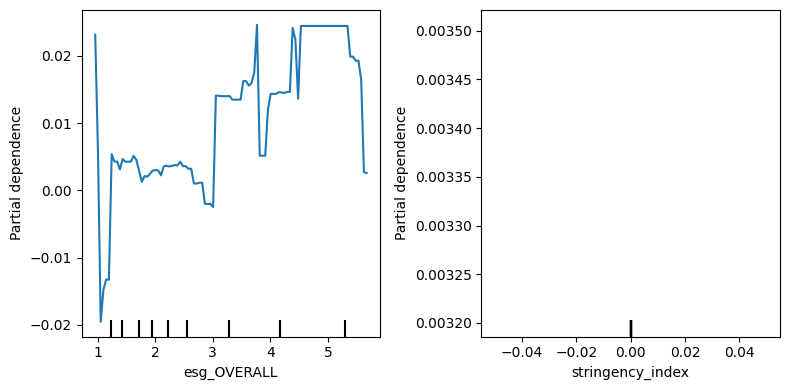

done in 8.521s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date",
                   'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' ,'interaction_e' , 'interaction_s' , 'interaction_g',
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


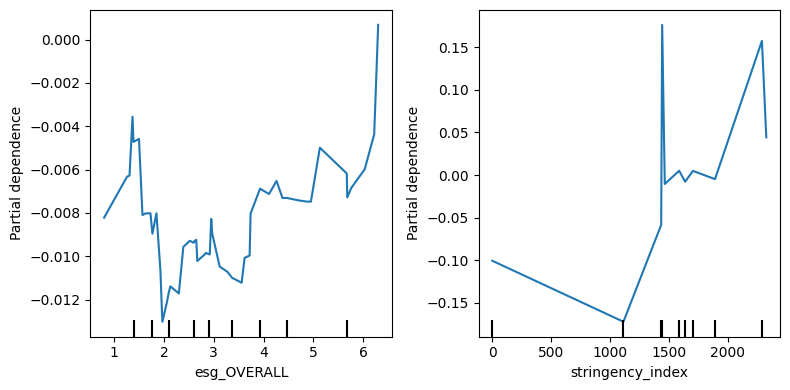

done in 5.925s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   "interaction_overall",'interaction_e' , 'interaction_s' , 'interaction_g',
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


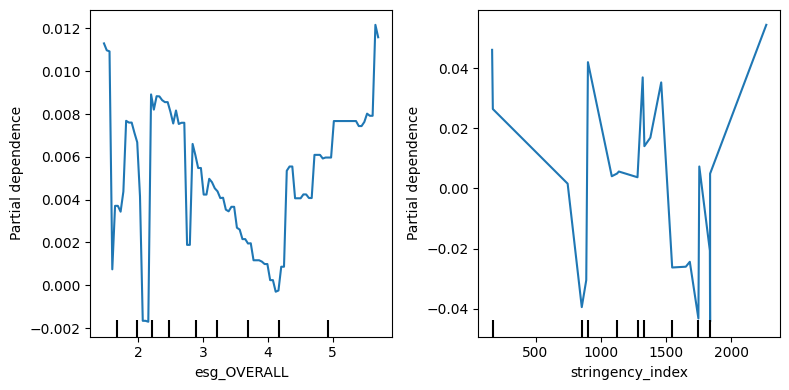

done in 8.189s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   "interaction_overall",'interaction_e' , 'interaction_s' , 'interaction_g',
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

## Vol

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


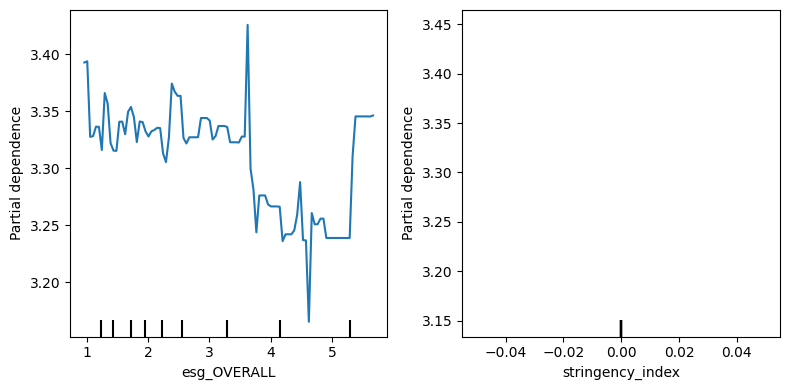

done in 1.548s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_e' , 'interaction_s' , 'interaction_g',"interaction_overall",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


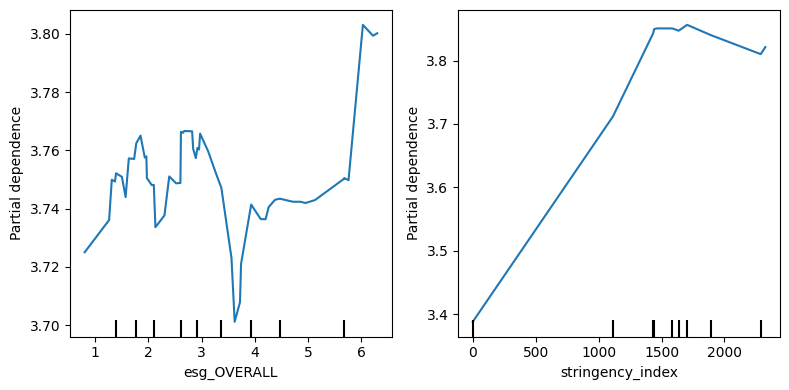

done in 3.081s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_e' , 'interaction_s' , 'interaction_g',"interaction_overall",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


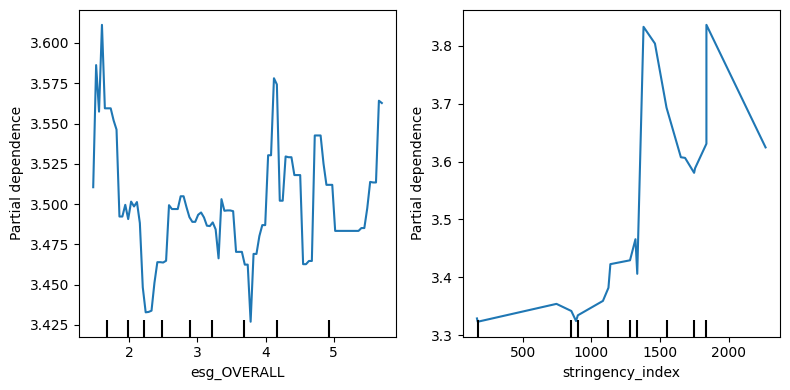

done in 5.707s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_e' , 'interaction_s' , 'interaction_g',"interaction_overall",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

## Liq

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


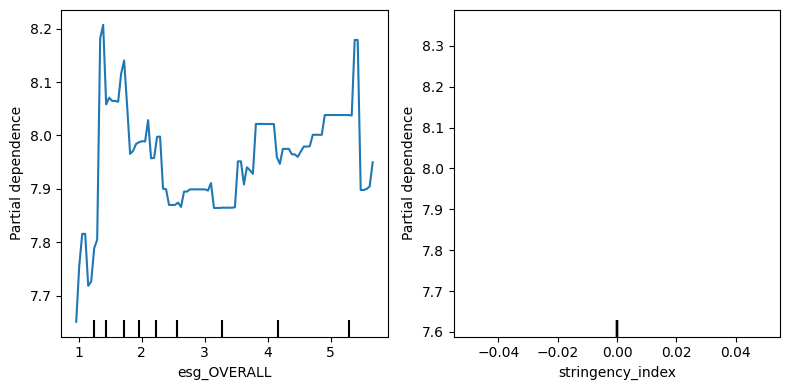

done in 4.114s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_e' , 'interaction_s' , 'interaction_g',"interaction_overall",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


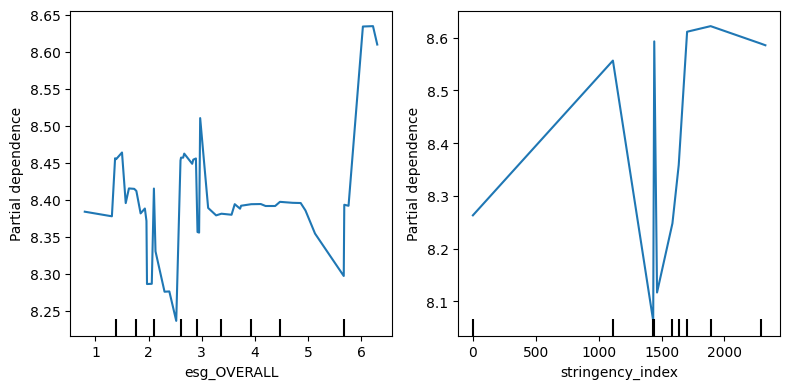

done in 4.333s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_e' , 'interaction_s' , 'interaction_g',"interaction_overall",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


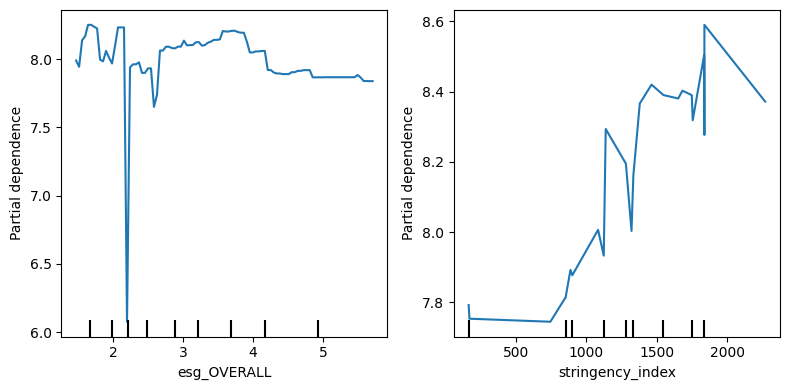

done in 9.872s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_E', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_e' , 'interaction_s' , 'interaction_g',"interaction_overall",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_OVERALL"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

# Envi

## return

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


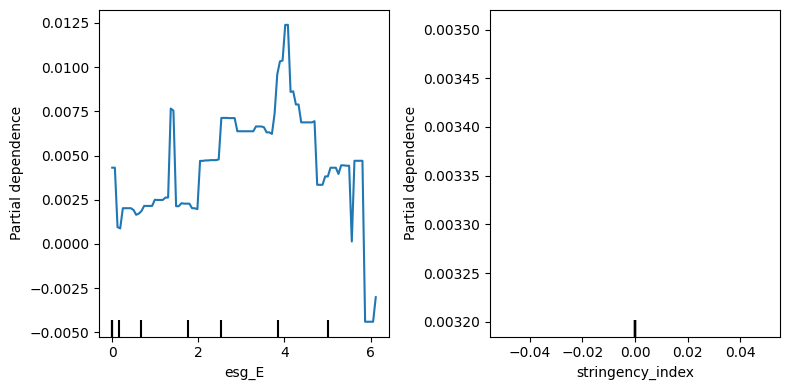

done in 4.221s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


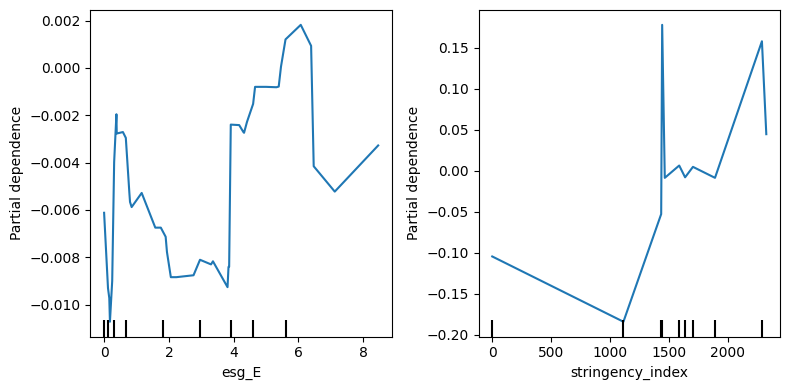

done in 4.263s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


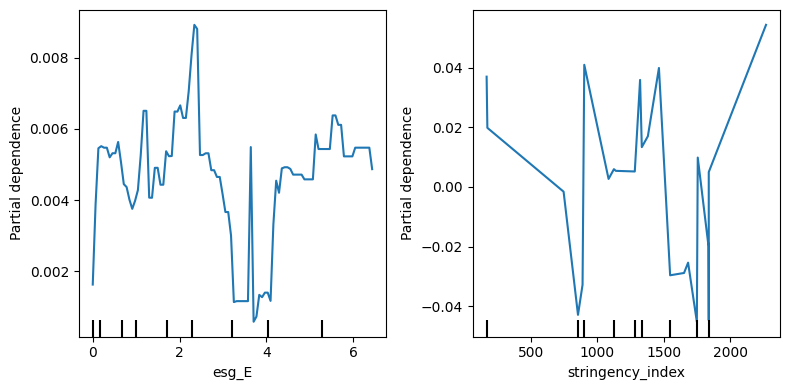

done in 5.852s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

##vol

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


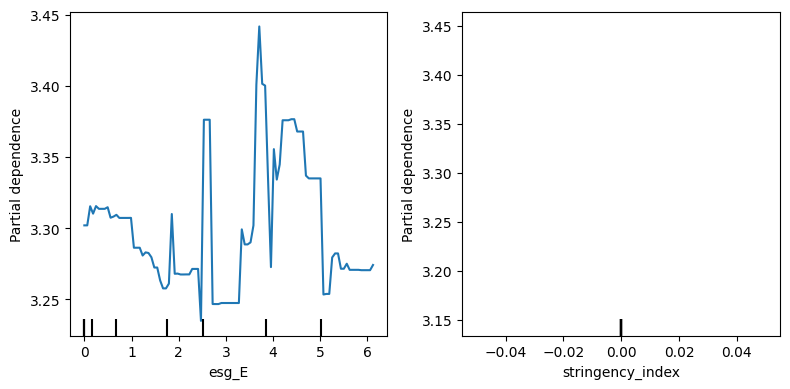

done in 5.928s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


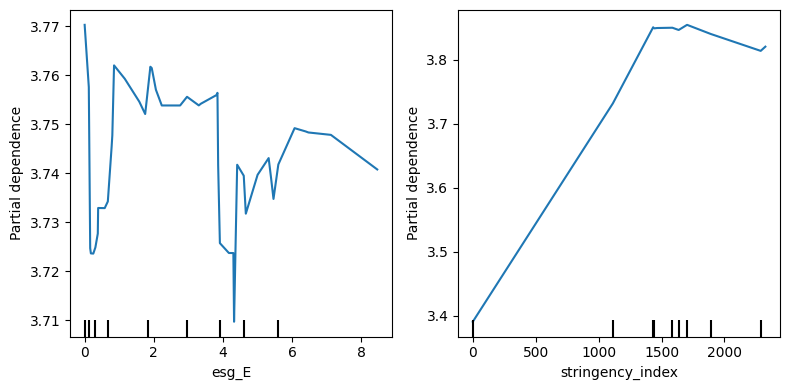

done in 4.209s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


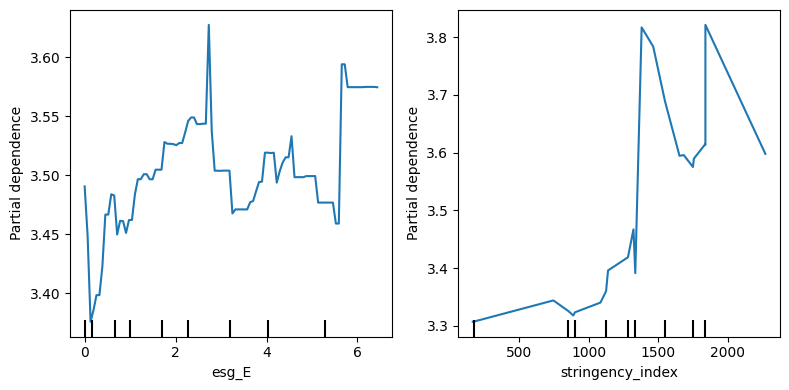

done in 2.238s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

## Liq

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


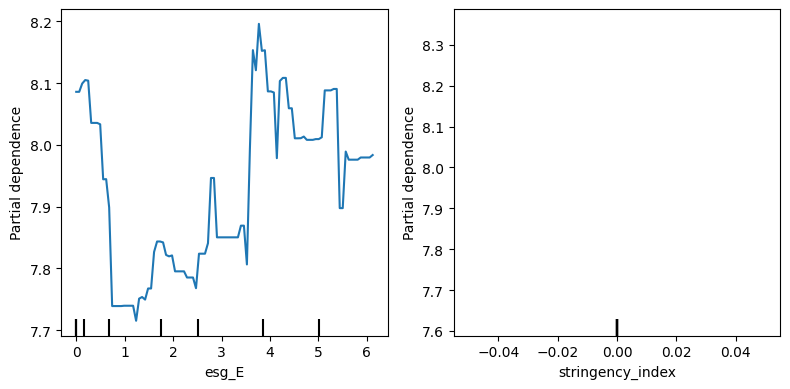

done in 6.230s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


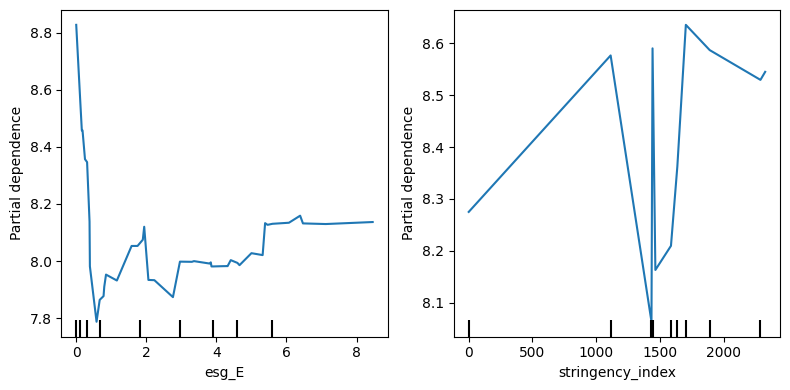

done in 3.920s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


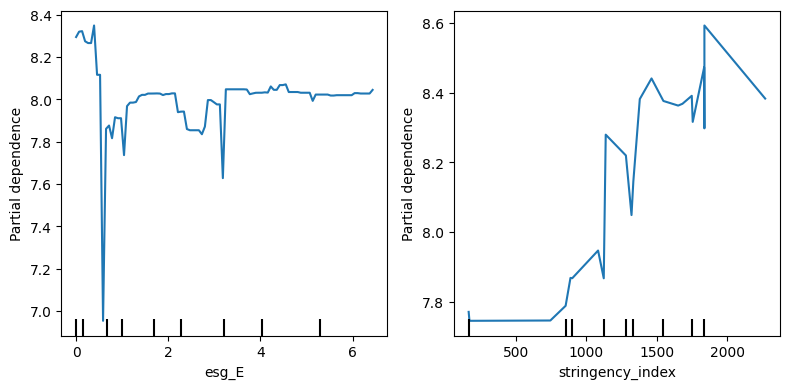

done in 8.104s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_g',"interaction_e",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_E"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

# Social

## return

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


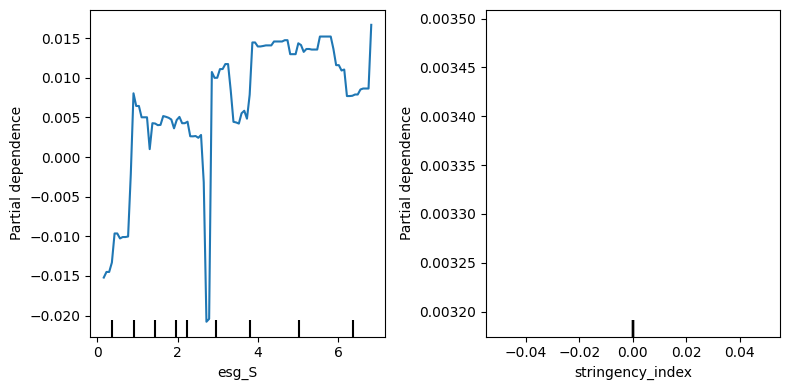

done in 2.757s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


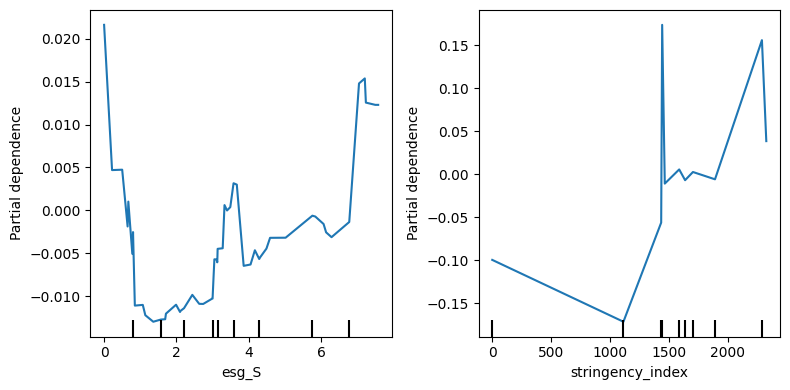

done in 4.537s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


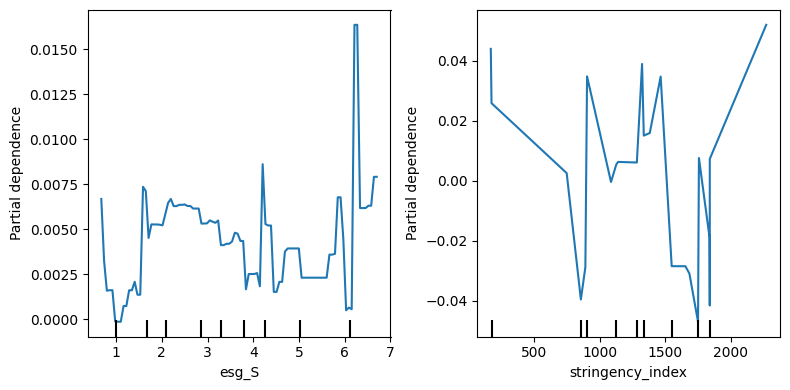

done in 7.787s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

##vol

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


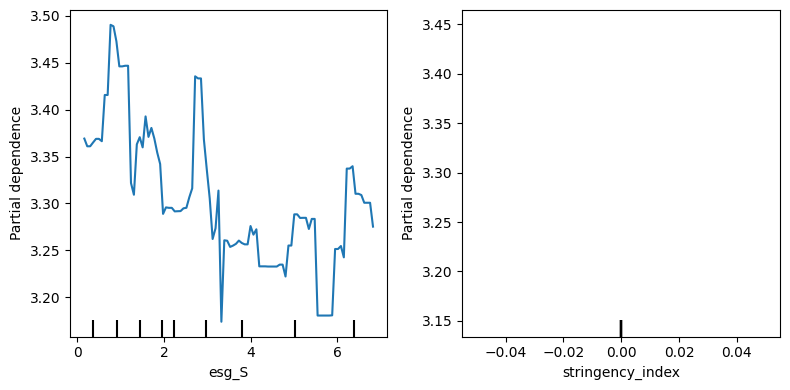

done in 6.598s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


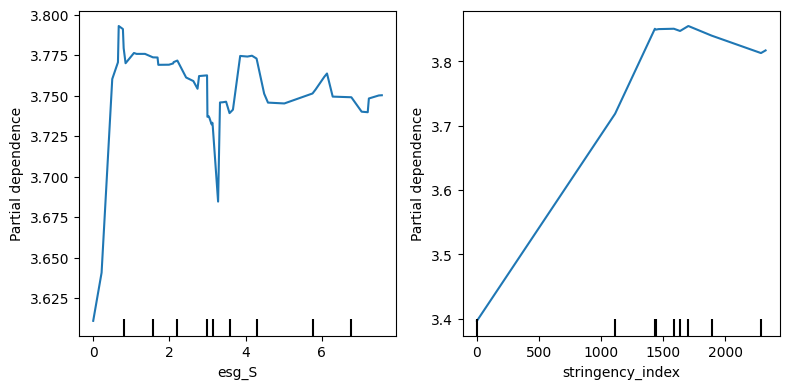

done in 5.566s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


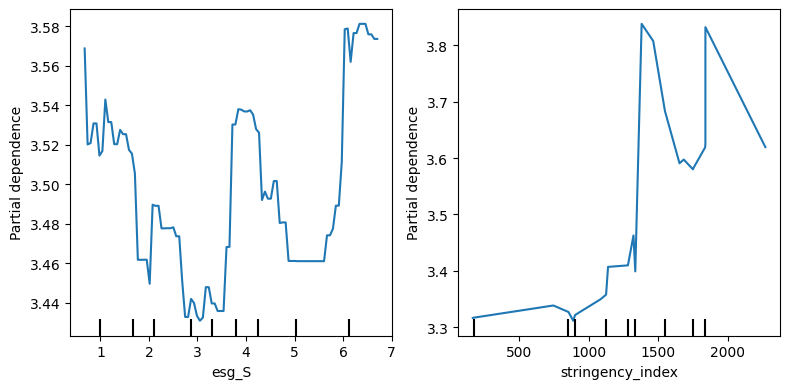

done in 8.336s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

## liq

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


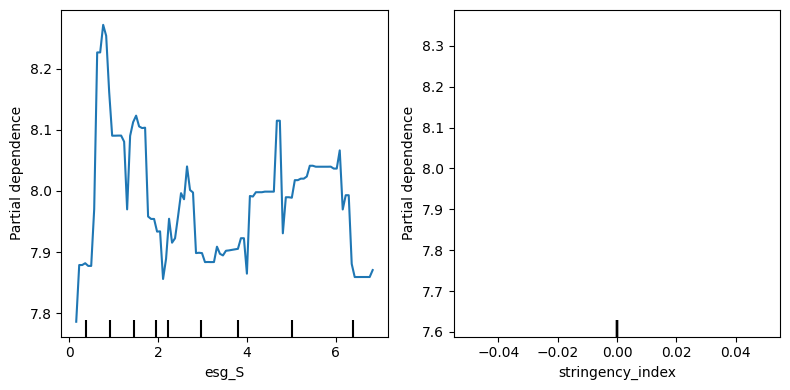

done in 9.717s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


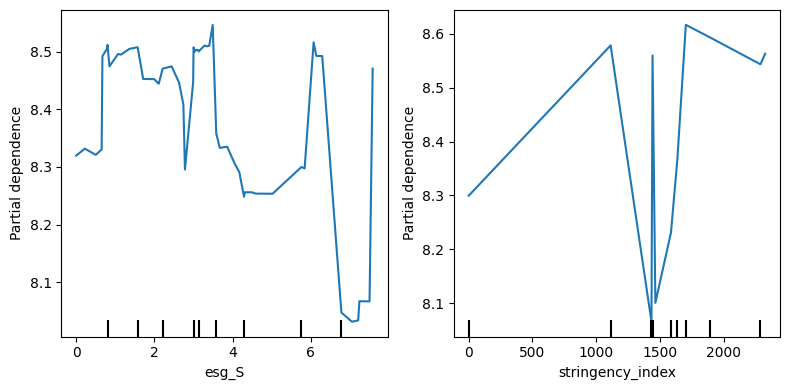

done in 3.891s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


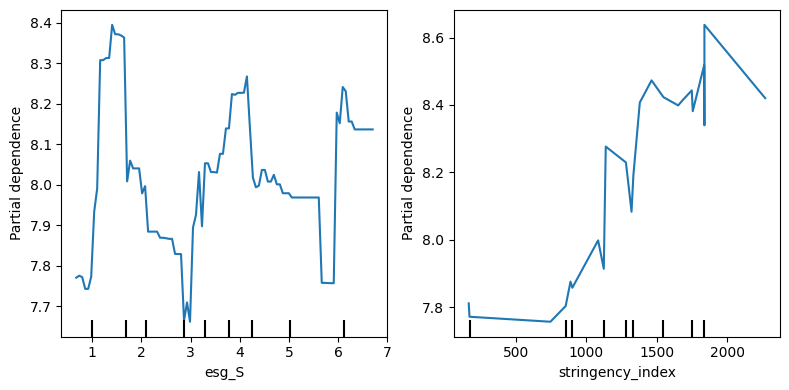

done in 7.110s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_E', 'esg_G',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_e' , 'interaction_g',"interaction_s",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_S"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

# Gov

## return

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


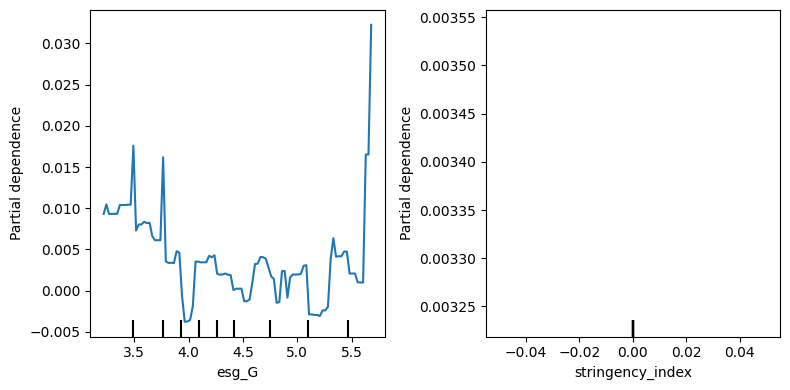

done in 4.991s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


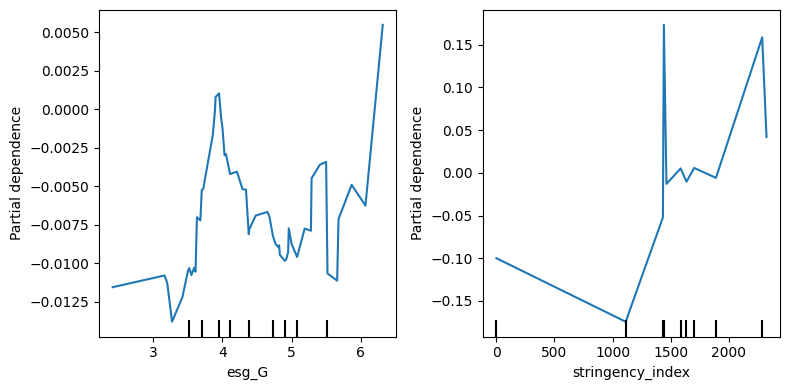

done in 4.806s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


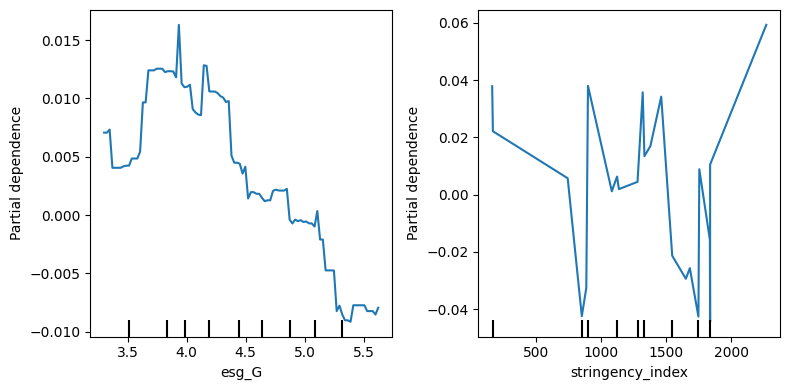

done in 6.407s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN', 'ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['RETURN'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

##vol

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


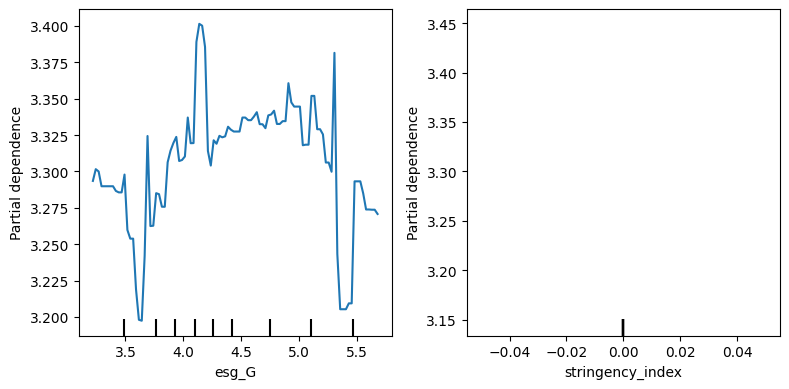

done in 6.348s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


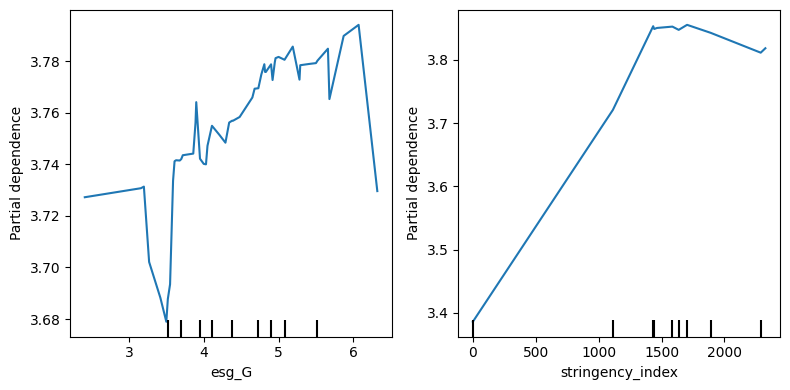

done in 4.436s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


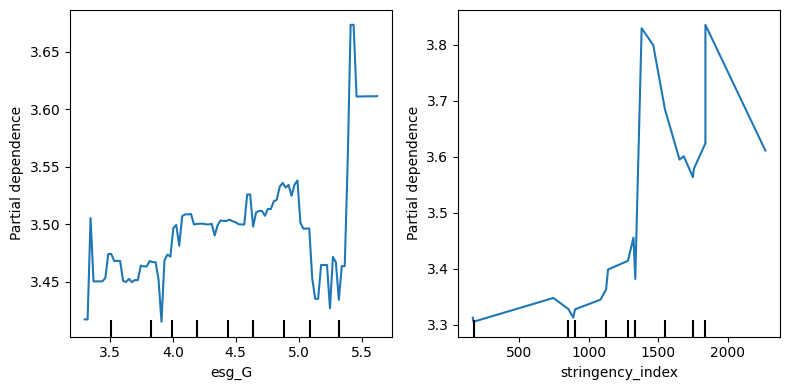

done in 7.038s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_vol'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

## liq

Computing partial dependence plots...


/usr/local/lib/python3.10/dist-packages/sklearn/inspection/_plot/partial_dependence.py:972: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([min_val, max_val])


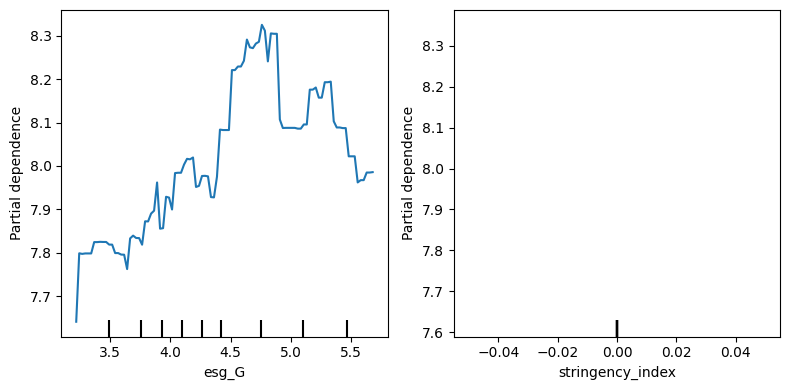

done in 6.414s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_precovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_precovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


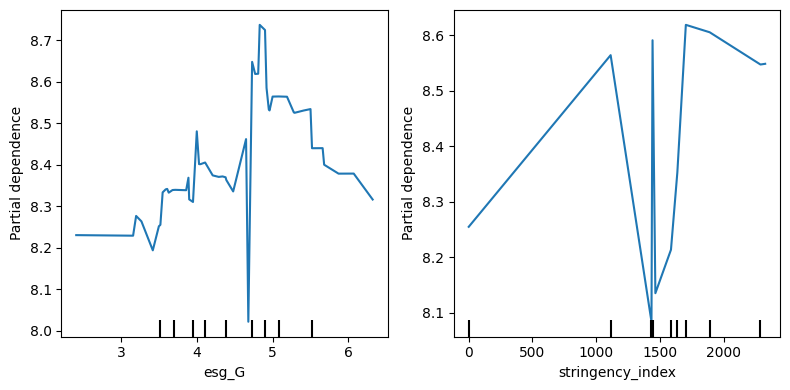

done in 2.867s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_covid.drop(columns_to_drop, axis=1) # Independent variables
y = df_covid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))

Computing partial dependence plots...


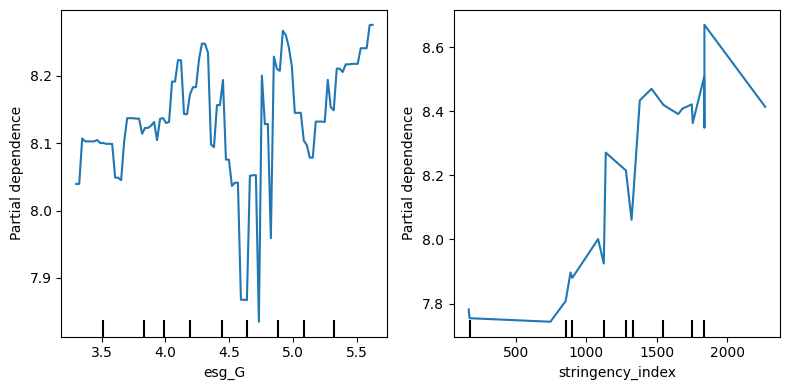

done in 7.442s


In [ ]:
print('Computing partial dependence plots...')
tic = time()

columns_to_drop = ["date", 'esg_OVERALL', 'esg_S', 'esg_E',
                   'RETURN','ln_vol', 'VOLATILITY_260D_CALC', 'LIQUIDITY', 'ln_liq',
                   'BS_TOT_ASSET', 'TOT_DEBT_TO_TOT_EQY', 'PX_TO_BOOK_RATIO', 'year',
                   'interaction_overall' , 'interaction_s' , 'interaction_e',"interaction_g",
                   'ticks', 'sector']
X = df_postcovid.drop(columns_to_drop, axis=1) # Independent variables
y = df_postcovid['ln_liq'] # Dependent variable

# train an XGBoost model
model = xgboost.XGBRegressor().fit(X, y)

fig, axes = plt.subplots(1,2,figsize=(8, 4))
axes[0].set_title("")
tree_disp1 = PartialDependenceDisplay.from_estimator(model, X, ["esg_G"], ax=axes[0])
axes[1].set_title("")
tree_disp2 = PartialDependenceDisplay.from_estimator(model, X, ["stringency_index"], ax=axes[1])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

print("done in {:.3f}s".format(time() - tic))